In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("learning1_data.csv")

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,25591,25592,25593,25594,25595,25596,25597,25598,25599,fault_type
0,-0.202268,-0.353959,-0.119095,0.247844,0.120783,-0.263038,-0.537206,-0.576838,-0.453532,-0.279206,...,0.071124,0.173103,0.548901,0.481414,0.422957,0.223891,0.001842,-0.218857,0.000951,1
1,0.809660,0.977984,-0.025524,-1.094791,-1.556198,-0.060669,1.057084,0.878002,0.246451,-0.800890,...,-0.246382,0.358700,0.048618,-0.172239,0.098558,1.466061,1.252963,0.190932,-0.384616,1
2,-0.283242,-0.188273,-0.175738,-0.118942,-0.096620,0.050365,-0.066805,-0.234286,0.166423,0.164054,...,-0.197872,0.999439,0.847681,0.051769,0.890592,1.043328,0.884492,0.792582,0.220288,1
3,0.144290,0.030802,0.245908,0.400738,0.250939,0.376150,-0.265817,0.010329,0.693247,-0.277882,...,-0.855152,-1.051428,-1.167517,-1.048143,0.088135,-0.213551,-0.387816,-0.188670,0.041774,1
4,0.147031,0.113169,0.218939,-0.442279,-0.780985,-0.673755,-0.355651,-0.073637,-0.030152,0.159664,...,-0.257708,-0.140300,0.295603,-0.060675,-0.335117,-0.440216,-0.322704,0.446788,0.769093,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-0.276886,-0.192730,0.108058,0.079642,-0.311127,-0.221611,-0.147273,-0.174633,-0.365725,-0.381783,...,-0.094367,-0.133169,0.044955,0.302521,0.241121,0.043294,0.003460,-0.033871,-0.104319,0
476,-0.115004,-0.141876,0.156770,0.342263,0.160012,0.018401,-0.048714,-0.215187,-0.239910,0.001983,...,0.398198,0.442239,0.557199,0.383141,0.367553,0.106910,-0.074565,0.101684,-0.073845,0
477,-0.240392,0.229288,0.115306,0.262058,0.342050,0.156611,-0.036038,-0.343879,-0.400363,-0.409394,...,0.057502,0.128183,0.287794,0.170361,0.267327,0.142104,-0.110235,-0.285532,-0.255486,0
478,-0.006846,0.094778,0.120428,0.285535,0.280125,0.027175,-0.165798,-0.301975,-0.359229,-0.233261,...,-0.683152,-0.270689,0.155243,0.085986,0.005096,-0.103922,-0.115395,0.294986,0.056098,0


## 분류 모델(랜덤포레스트)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


X = data.drop(columns=['fault_type'])  
y = data['fault_type']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.78125
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       0.91      0.34      0.50        29
           2       0.47      0.89      0.62        18
           3       0.96      1.00      0.98        23

    accuracy                           0.78        96
   macro avg       0.83      0.81      0.77        96
weighted avg       0.85      0.78      0.77        96



## SVM

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


X = data.drop(columns=['fault_type'])
y = data['fault_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_model = SVC(kernel='rbf', random_state=42)


svm_model.fit(X_train_scaled, y_train)


y_pred = svm_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.875
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      0.59      0.74        29
           2       0.62      1.00      0.77        18
           3       0.96      1.00      0.98        23

    accuracy                           0.88        96
   macro avg       0.89      0.90      0.87        96
weighted avg       0.92      0.88      0.87        96



In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split


X = data.drop(columns=['fault_type'])
y = data['fault_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid = {
    'C': [0.1, 1, 10, 100],           # 규제 파라미터
    'gamma': [1, 0.1, 0.01, 0.001],   # RBF 커널의 gamma 값
    'kernel': ['rbf', 'poly', 'sigmoid']  # 다양한 커널을 테스트
}


grid = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=2, cv=3)
grid.fit(X_train_scaled, y_train)


print(f"Best Parameters: {grid.best_params_}")


y_pred = grid.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   4.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   4.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   4.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.8s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   2.5s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=  17.4s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   2.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   4.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   4.2s
[CV] END .......................C=0.1, gamma=0.

c:\Users\m\anaconda3\envs\dav\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\m\anaconda3\envs\dav\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\m\anaconda3\envs\dav\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## LGBM

In [7]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 데이터 분할 (X: 특성, y: 타겟 레이블)
X = data.drop(columns=['fault_type'])
y = data['fault_type']

# 데이터 세트 분할 (80% 학습용, 20% 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LGBM 모델 초기화
lgbm_model = LGBMClassifier(boosting_type='gbdt', objective='multiclass', random_state=42)

# 모델 학습
lgbm_model.fit(X_train, y_train)

# 예측 수행
y_pred = lgbm_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.547972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3292321
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 25600
[LightGBM] [Info] Start training from score -1.407348
[LightGBM] [Info] Start training from score -1.439783
[LightGBM] [Info] Start training from score -1.325670
[LightGBM] [Info] Start training from score -1.375932
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.296910 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3292321
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 25600
[LightGBM] [Info] Start training from score -1.407348
[LightGBM] [Info] Start training from score -1.439783
[LightGBM] [Info] Start training from score -1.325670
[LightGBM] [Info] Start training from score -1.375932
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

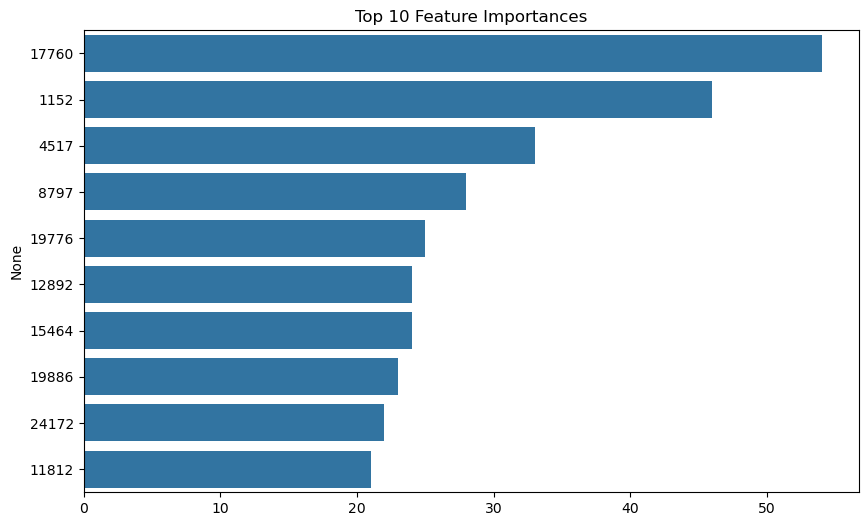

In [8]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np

# 데이터 전처리 예시 (결측값 처리, 범주형 데이터 인코딩 등)
# 결측값이 있을 경우 평균으로 채움 (또는 다른 방법 선택 가능)
X = data.drop(columns=['fault_type'])
X = X.fillna(X.mean())  # 결측값을 평균으로 대체

# 범주형 변수가 있다면 One-Hot Encoding (필요에 따라 처리)
# X = pd.get_dummies(X)  # 범주형 데이터를 더미 변환 (필요한 경우 사용)

y = data['fault_type']

# 데이터 세트 분할 (80% 학습용, 20% 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LGBM 모델 초기화 (하이퍼파라미터 추가)
lgbm_model = LGBMClassifier(boosting_type='gbdt', 
                            objective='multiclass', 
                            num_leaves=31,  # 기본값 31, 노드의 최대 수
                            learning_rate=0.05,  # 학습률, 기본값 0.1
                            n_estimators=100,  # 부스팅 반복 횟수
                            random_state=42)

# 모델 학습
lgbm_model.fit(X_train, y_train)

# 예측 수행
y_pred = lgbm_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

# 특성 중요도 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 중요도 가져오기
feature_importances = lgbm_model.feature_importances_
features = X.columns

# 중요도 정렬
indices = np.argsort(feature_importances)[::-1]

# 상위 10개 특성 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[indices][:10], y=features[indices][:10])
plt.title('Top 10 Feature Importances')
plt.show()
